# Operaciones morfológicas: Dilatación - Erosión - Apertura - Cierre e imFill

In [1]:
#Librerias
import matplotlib.pyplot as plt
import skimage
from skimage import io
import cv2 as cv
import numpy as np

In [2]:
#Lectura de la imagen
Im1 = cv.imread('hoja00.jpg')


In [3]:
#Pasamos la imagen RGB to gray
Im = cv.cvtColor(Im1, cv.COLOR_RGB2GRAY)

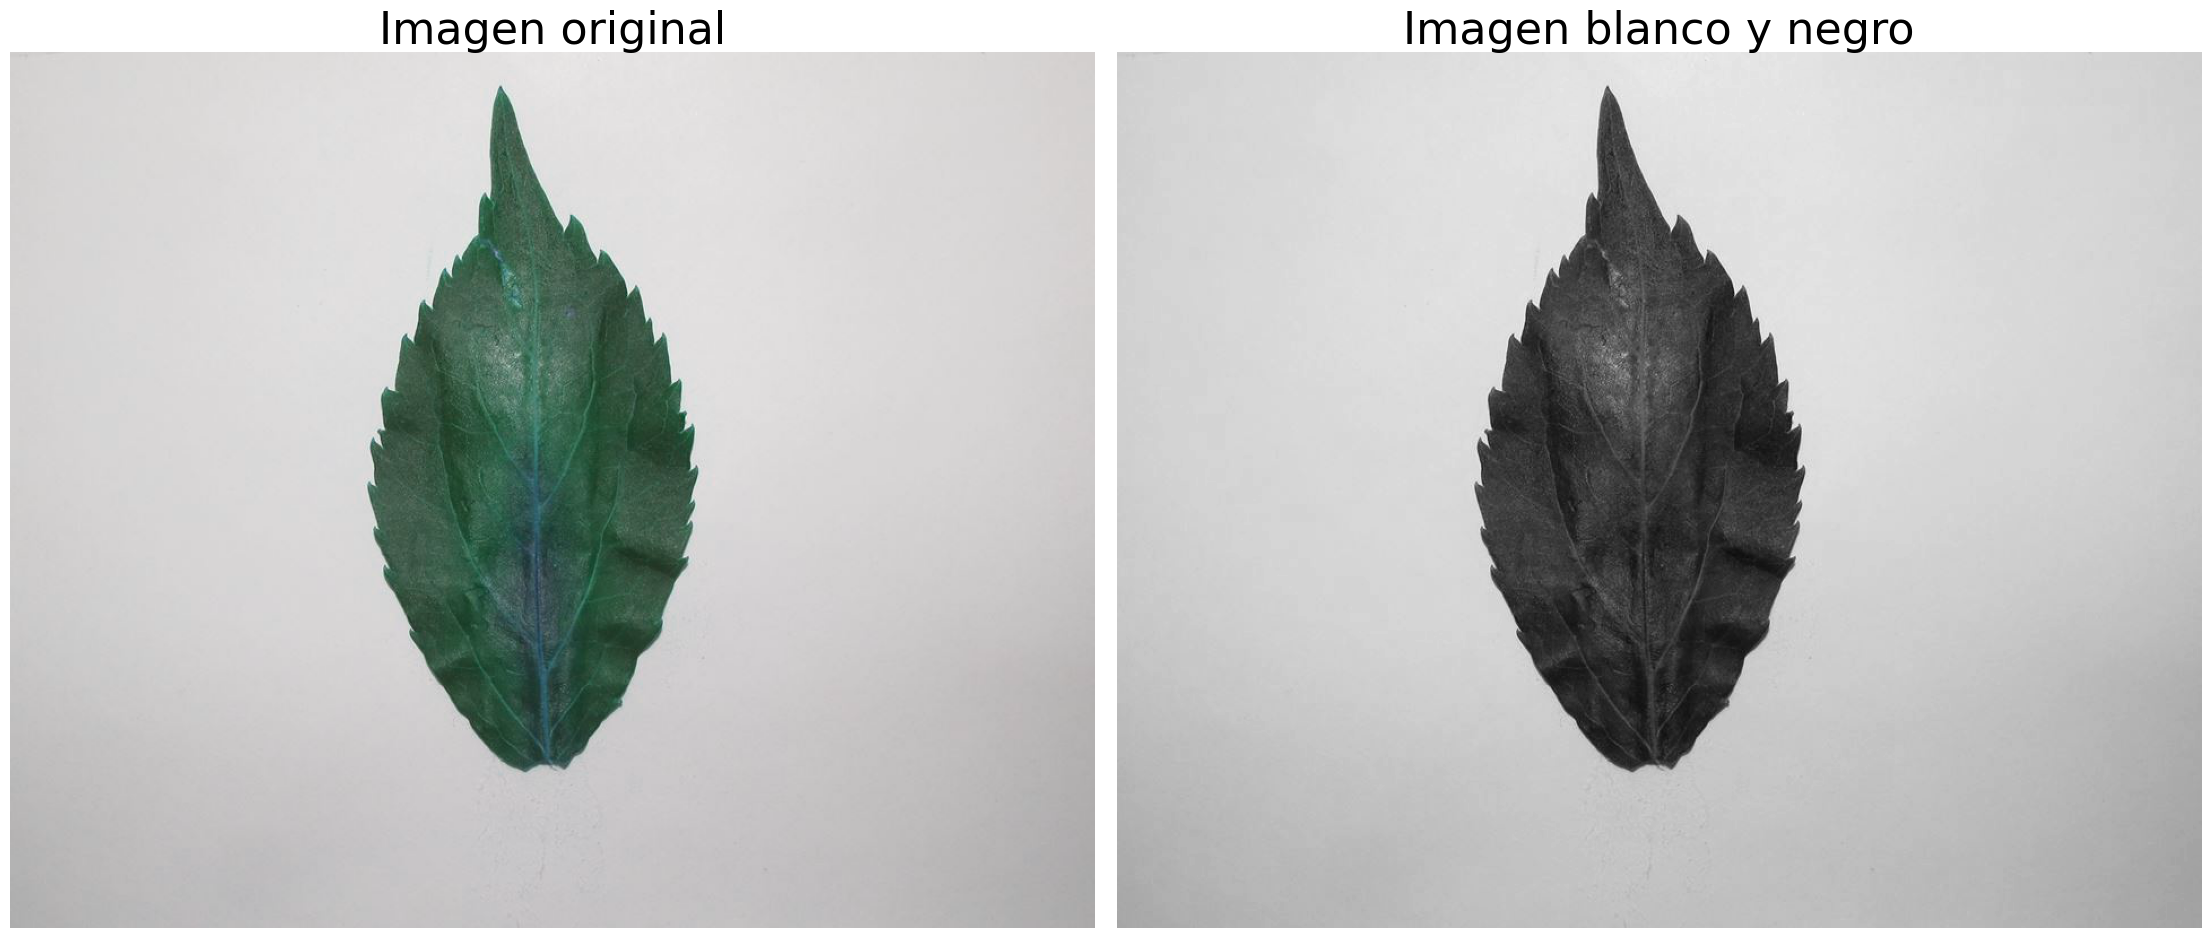

In [4]:
#Visualización: Imagen original - Imagen Blanco y negro
fig, axes = plt.subplots(1, 2,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0].imshow(Im1, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Imagen original', fontsize=32)

axes[1].imshow(Im, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Imagen blanco y negro', fontsize=32)
plt.show()

In [5]:
#Operaciones morfológica
kernel = np.ones((5,5),np.uint8)
#Dilatación
D = cv.dilate(Im,kernel,iterations = 1)
#Erosión
E = cv.erode(Im,kernel,iterations = 1)
#Apertura
A= cv.morphologyEx(Im, cv.MORPH_OPEN, kernel)
#Cierre
C = cv.morphologyEx(Im, cv.MORPH_CLOSE, kernel)


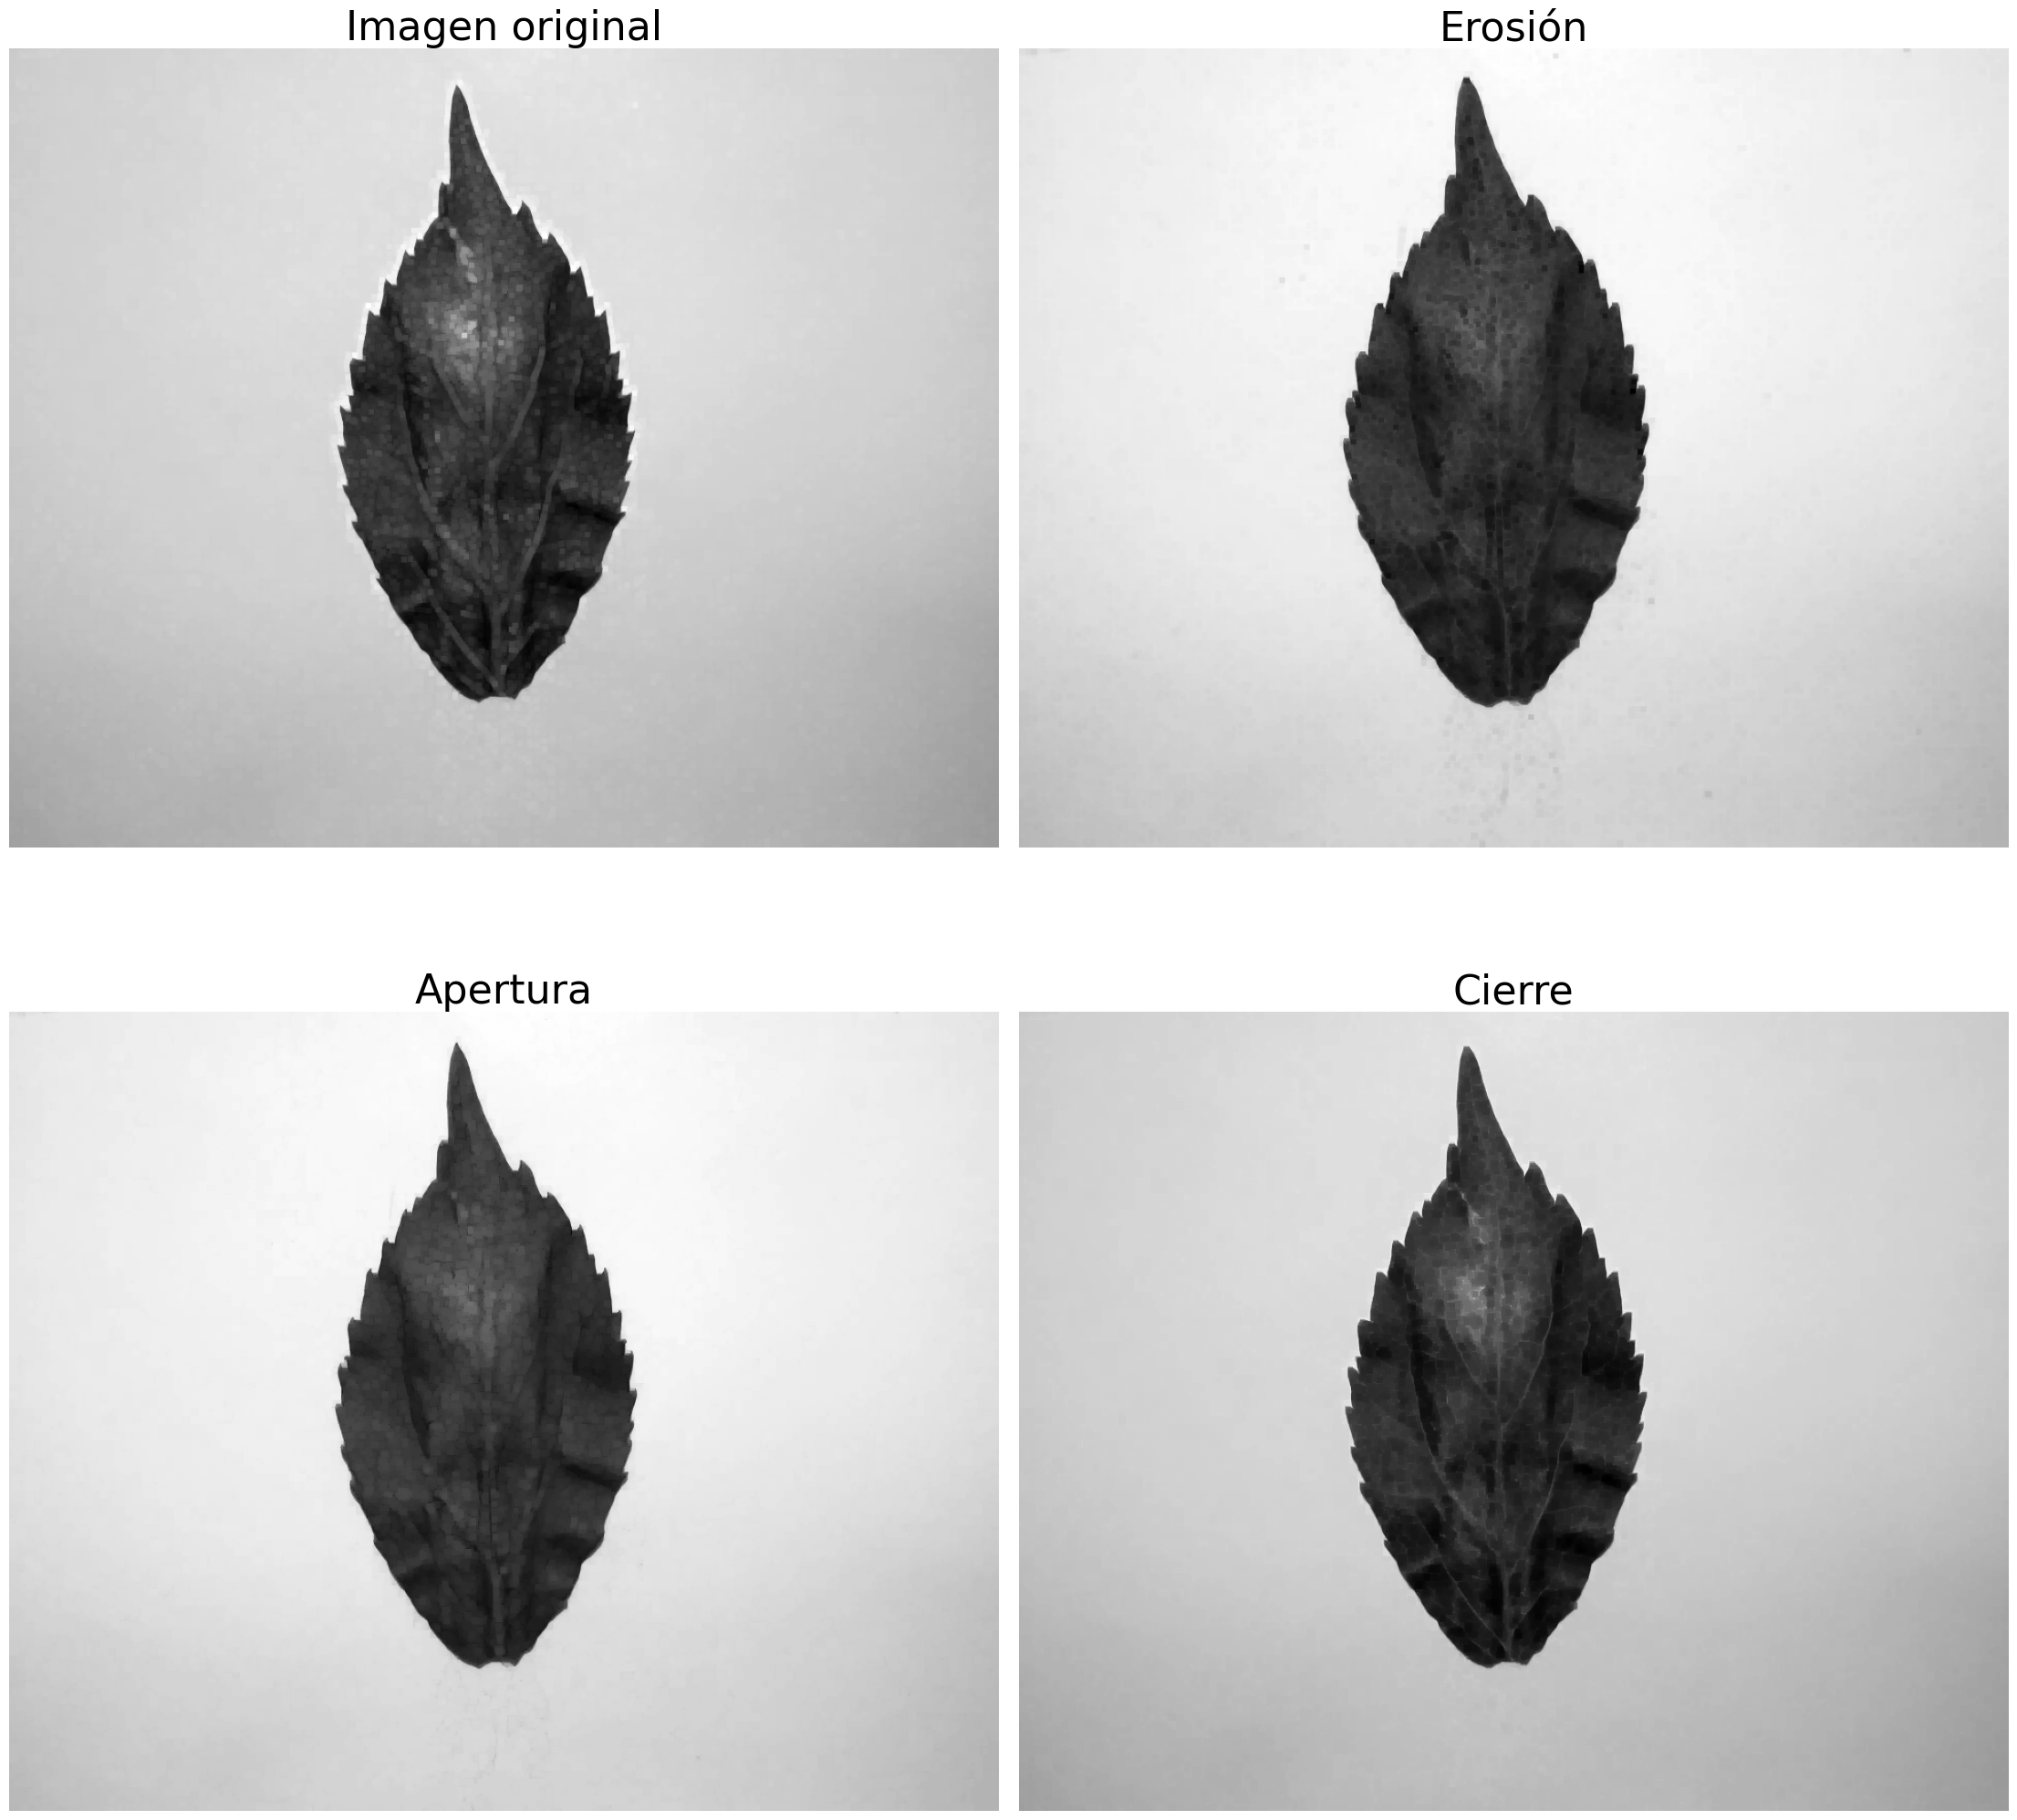

In [6]:
#Visualización OM
fig, axes = plt.subplots(2, 2,
                         figsize=(22,21),constrained_layout=True)

# Plot 
img = axes[0,0].imshow(D, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Imagen original', fontsize=32)


axes[0,1].imshow(E, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('Erosión', fontsize=32)

axes[1,0].imshow(A, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('Apertura', fontsize=32)

axes[1,1].imshow(C, cmap='gray')
axes[1,1].axis('off')
axes[1,1].set_title('Cierre', fontsize=32)

plt.show()

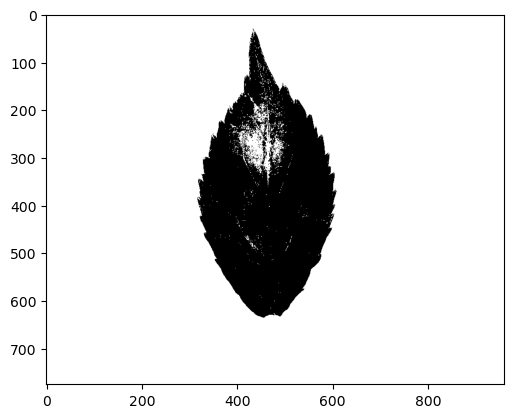

In [7]:
#Binarización de la imagen para posteriormente realizar el llenado de huecos
b , imgBin = cv.threshold(Im, 100 ,255, cv.THRESH_BINARY)
plt.imshow(imgBin, cmap='gray')

In [8]:
# *****************************************************************************************************************************
#Llenado de huecos--------------------------------------------------------------------------------------------------------------
# *****************************************************************************************************************************
#Copiar la imagen umbralizada
im_floodfill = imgBin.copy()
 
# Mask para llenado de huecoos
# El tamaño de la máscara debe ser 2 pixeles más que la imagen en ancho y alto.
h, w = imgBin.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill desde el punto (0, 0)
cv.floodFill(im_floodfill, mask, (0,0), 0);
 
# Invertir la imagen de llenar huecos
im_floodfill_inv = cv.bitwise_not(im_floodfill)
 
# Combinar las dos imagenes para obtener el llenado y fondo apropiado
H = cv.bitwise_xor(im_floodfill, imgBin)

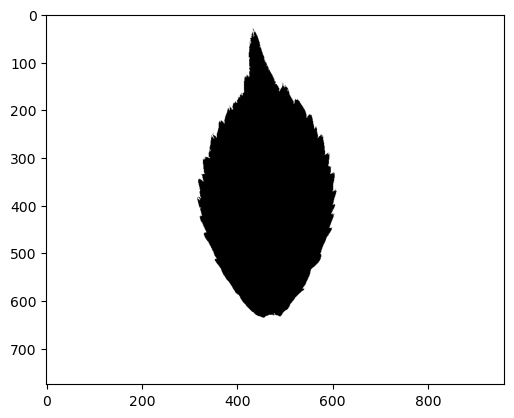

In [9]:
plt.imshow(H, cmap='gray')